<a href="https://colab.research.google.com/github/justinbkeeler/Datasets/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load Data

In [38]:
url = "https://raw.githubusercontent.com/justinbkeeler/Datasets/refs/heads/main/usedcarsUSA.csv"
cars = pd.read_csv(url)

Load text file from Chatper 7 of your textbook Authors.

In [ ]:
url2 = "https://raw.githubusercontent.com/justinbkeeler/Datasets/refs/heads/main/customer%20sample%20data%20(simple%20linear%20regression).txt"
df = pd.read_csv(url2)

In [ ]:
df.describe()

,100 10
count,20
unique,20
top,82 8
freq,1


Need to make adjustments to the text file from the textbook author, I'll explain in class.

In [ ]:
df = pd.read_csv(url2, names = ['Sales_Effort', 'Product_Sales'], sep= ' ')
df

,Sales_Effort,Product_Sales
0,100,10
1,82,8
2,71,7
3,111,11
4,112,11
5,61,6
6,62,6
7,113,11
8,101,10
9,99,10


# Perform Basic Descriptives

I chose variables that are complete e.g. RAM and Price. There are 2,160 values for both. There is no need to do missing value imputations.

In [39]:
# count the number of unique values in each column of the laptop dataframe
unique_counts = cars.nunique()

# display the result
print(unique_counts)

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64


<font color='red'>What does this exactly mean about the different variable types and what I chose for you in your predetermined X and y in this lab?</font>


In [40]:
# review the head and descriptives, get a preview of missing data
print(cars.head())
print(cars.describe())

   Unnamed: 0  price      brand    model  year   title_status   mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle  274117.0   
1           1   2899       ford       se  2011  clean vehicle  190552.0   
2           2   5350      dodge      mpv  2018  clean vehicle   39590.0   
3           3  25000       ford     door  2014  clean vehicle   64146.0   
4           4  27700  chevrolet     1500  2018  clean vehicle    6654.0   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  
        Unnamed: 0         price         year       mileage           lot
c

In [41]:
cars.shape

(2499, 13)

In [45]:
cars.dtypes

,0
Unnamed: 0,int64
price,int64
brand,object
model,object
year,int64
title_status,object
mileage,float64
color,object
vin,object
lot,int64


In [43]:
cars['Country_cat'] = cars['country'].astype('category')

# Get Dummies

In [44]:
cars = pd.get_dummies(cars, columns=['country'])

# Prepare Model Variables for Train & Test Split

## Step 1: Assign Predictor(s)/Feature(s) to X and Target to y

In [52]:
X = cars[['mileage', 'year']]  # Predictor(s) | Feature(s) *** more predictors would like X = laptops[['RAM', 'Storage', 'Screen Size', 'etc.']] ***
y = cars['price']  # Target or Outcome

In [47]:
print(X)

       mileage  year  country_ usa
0     274117.0  2008          True
1     190552.0  2011          True
2      39590.0  2018          True
3      64146.0  2014          True
4       6654.0  2018          True
...        ...   ...           ...
2494   23609.0  2019          True
2495   34553.0  2018          True
2496   31594.0  2018          True
2497   32557.0  2018          True
2498   31371.0  2018          True

[2499 rows x 3 columns]


## Step 2: Derive split variables

In [54]:
from sklearn.model_selection import train_test_split # library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state is also called seed value for reproduction

In [49]:
X_train.shape

(1999, 3)

In [50]:
y_train.shape

(1999,)

<font color='red'>How would a training set of 70%, validation set of 15% and test set of 15% be derived?</font>

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Fit Simple Linear Regression Model (Preferred)

In [55]:
from statsmodels.formula.api import ols
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.85e-100
Time:                        21:11:05   Log-Likelihood:                -21381.
No. Observations:                1999   AIC:                         4.277e+04
Df Residuals:                    1996   BIC:                         4.278e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.782e+06   1.69e+05    -10.563      0.0

<font color='red'>What are your thoughts on Skewness? What does a value of < 2 on the DW suggest?</font>

# Fit Simple Linear Regression Model (Like your textbook)

In [ ]:
# Step 0: Import ols library from Statsmodels.api
from statsmodels.formula.api import ols

# Step 1: Combine your x_train and y_train into a single DataFrame
train_df = pd.DataFrame(X_train, columns=['RAM'])  # Adjust column name as needed
train_df['Final_Price'] = y_train

# Step 2: Use the formula interface
model2 = ols('Final_Price ~ RAM', data=train_df).fit()

# Step 3: Print the summary like above
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            Final_Price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1934.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.59e-284
Time:                        23:12:51   Log-Likelihood:                -13553.
No. Observations:                1728   AIC:                         2.711e+04
Df Residuals:                    1726   BIC:                         2.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    247.8657     28.085      8.826      0.0

## Assumption Checks

### Train Data

In [56]:
# load library (if not already done)
from statsmodels.stats.outliers_influence import OLSInfluence

# establish the residual/error object (see my handout called Assumptions of Linear Regression)

# Step 1: predicted y values from training data
y_train_pred = model.predict(X_train_const)

# Step 2: calculate error/residual by taking the difference
y_train_residuals =  np.array(y_train) - np.array(y_train_pred)

# Step 3a: calculate the studentized residuals
y_train_studentized_residuals = model.get_influence().resid_studentized_internal

# Step3b: calculate the standardized residuals
y_train_standardized_residuals = model.resid / model.resid.std() # providing this so you can see residuals (unstandardized) are calcuated from the model without manually doing it as above

#### 1. Linearity

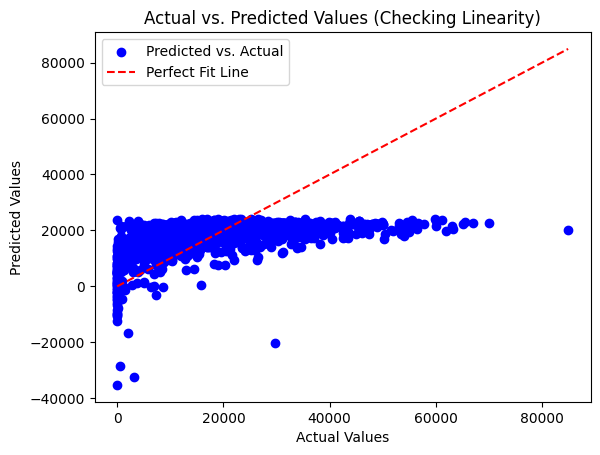

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a model fit and predicted values
y_pred = model.predict(X_train_const)  # Predicted values
y_actual = y_train

# Scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred, label='Predicted vs. Actual', color='blue')

# Plot the ideal (perfect prediction) line
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', label='Perfect Fit Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Checking Linearity)')
plt.legend()
plt.show()


<font color='red'>Why aren't the actual data points on the fitted line?</font>

#### 2. Independence of Residuals

In [26]:
from statsmodels.stats.stattools import durbin_watson
dw_result = durbin_watson(y_train_residuals)
print(dw_result)

1.9656558223561273


What to Look For:


*   Random scatter: The residuals should be randomly scattered around the horizontal line at 0 (red dashed line).
*  No clear patterns: If you see a pattern (e.g., a funnel shape, curve, or cluseters), this could indicate the model is not appropriately capturing the linear relationship, and there may be non-linearity in the data.



Interpretation of the Training Residuals


*   Non-random patterns are suggestive in the residuals, as evidenced at the higher predicted values where the residuals fan out. Our concern is heteroscedasticity (variance of residuals increases with larger predicted values) or potential non-linearity.
*  Ideally, for the linearity assumption to hold, the residuals should be more uniformly spread across the predicted values, without any fanning or systematic patterns.



What to Look For:


*   DW statistic closer to 0 suggest positive autocorrelation i.e., residual is positive, the next residual is likely to be positive, vice versa for negative.
*   DW statistic closer to 4, suggest negative autocorrelation i.e., residual is negative the next residual is likely to be positive, vice versa for positive.



Interpreation of Training Residuals


*   DW is close to 2 with 1.956, thus no significant autocorrelation and assumption is satisfied.



#### 3. Homoscedasticity of Residuals

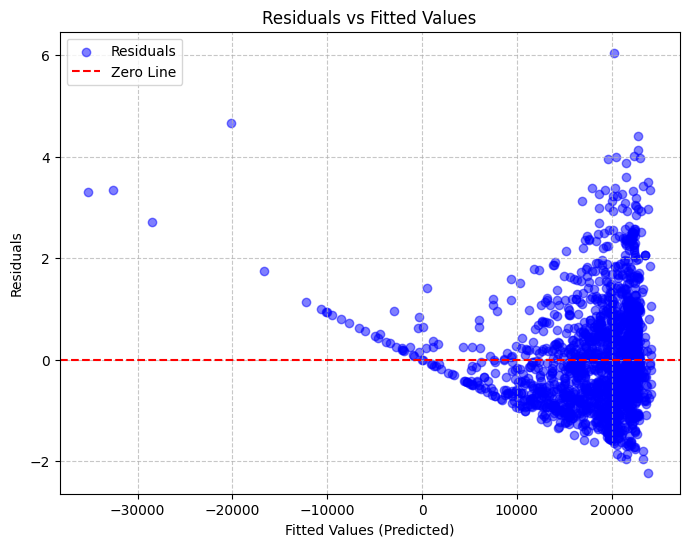

In [29]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_actual - y_pred  # Basic residuals
# OR for studentized residuals (like in your original image):
from scipy import stats
studentized_residuals = stats.zscore(residuals)  # Standardized residuals

# Create the residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, studentized_residuals,  # Note the order: x=predicted, y=residuals
           color='blue',
           alpha=0.5,
           label='Residuals')

# Add horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

# Add labels and title
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

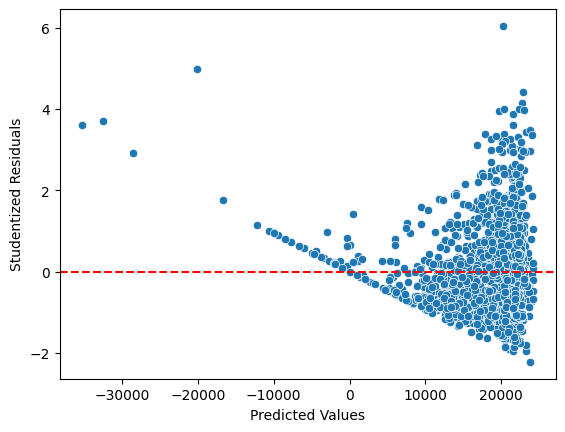

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
#predicted_values = model.predict(X) | did this above
#residuals = y - predicted_values | did this above
sns.scatterplot(x=y_train_pred, y=y_train_studentized_residuals) # more accurate is using y_train_studentized_residuals vs y_train_residuals
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Studentized Residuals') # make sure to update this based on what you set the y = value too, i.e. Residuals, Studentized Residuals, Standardized Residuals
plt.show()

Interpretation: The spread of residuals is roughly constant across all predicted values. In this plot, the spread of residuals appears to be relatively consistent across different predicted values, though there might be some slight patterns.

#### 4. Multivariate Normality of Residuals

P-value for Shapiro-Wilk Test: 4.3594614049997246e-30


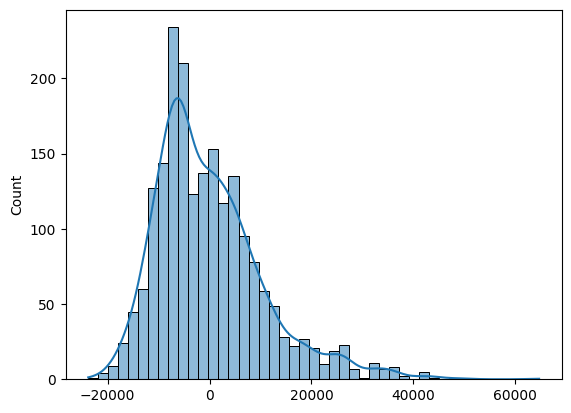

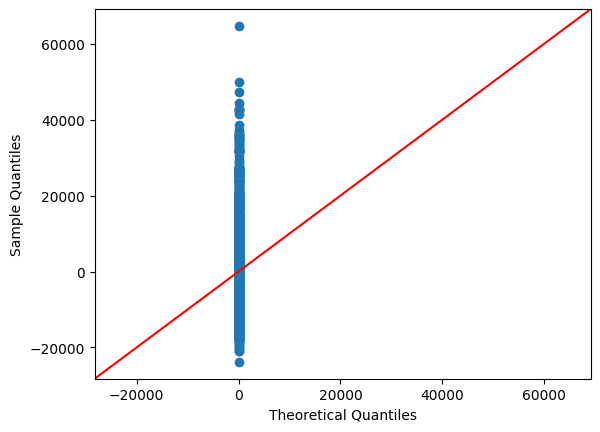

In [31]:
from scipy.stats import shapiro

# Histogram
sns.histplot(y_train_residuals, kde=True)

# Shapiro-Wilk Test
stat, p_value = shapiro(y_train_residuals)
print(f"P-value for Shapiro-Wilk Test: {p_value}")

# QQ-plots
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X (independent variable) and Y (dependent variable)
# X = sm.add_constant(X) # Add a constant to the model (i.e., bias or intercept)

# model = sm.OLS(Y, X).fit()
# Assume 'residuals' is a list or array of residuals from your model
# residuals = model.resid

# Now, plot the QQ plot
sm.qqplot(y_train_residuals, line='45') # The line='45' adds a 45-degree line on the plot for reference
plt.show()

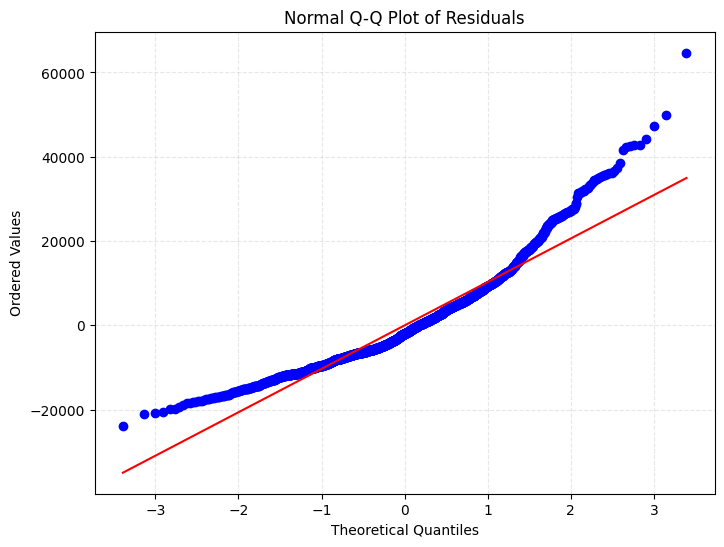

In [32]:
import matplotlib.pyplot as plt
from scipy import stats

# Create probability plot (Q-Q plot)
plt.figure(figsize=(8, 6))

# Generate Q-Q plot using residuals
stats.probplot(y_train_residuals, dist="norm", plot=plt)

# Customize the plot
plt.title('Normal Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

# Optional: Add grid
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

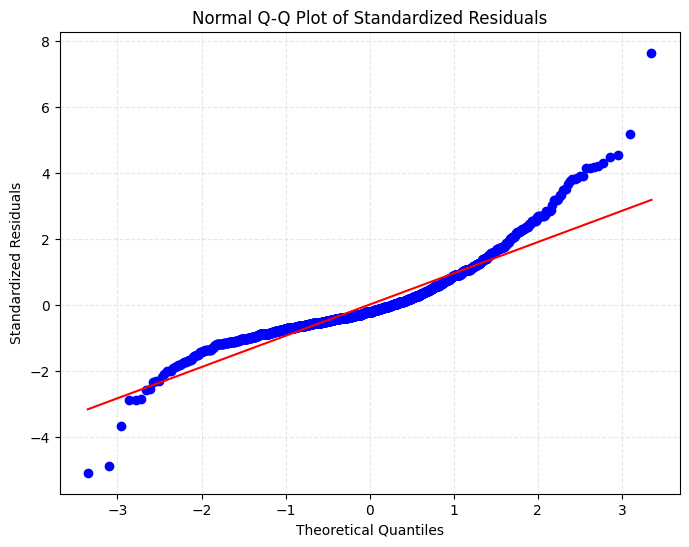

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

# Standardize the residuals
standardized_residuals = (y_train_residuals - np.mean(y_train_residuals)) / np.std(y_train_residuals)
# OR use scipy's zscore which does the same thing:
# standardized_residuals = stats.zscore(y_train_residuals)

# Create probability plot
plt.figure(figsize=(8, 6))

# Generate Q-Q plot using standardized residuals
stats.probplot(standardized_residuals, dist="norm", plot=plt)

# Customize the plot
plt.title('Normal Q-Q Plot of Standardized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

# Optional: Add grid
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

**<font color='purple'>AI Assistance/Prompt: Interpret the image (snipped SW and both plots) via Window Shift S</font>**

*Claude 3.5 Sonnet Response*

Based on these diagnostic plots (histogram with density curve and Q-Q plot) and the Shapiro-Wilk test p-value (2.74e-29), we can conclude that the residuals are NOT normally distributed. Here's the detailed interpretation:

**Shapiro-Wilk Test:**

*   P-value is extremely small (2.74e-29 << 0.05)
*   Null hypothesis (that data is normally distributed) is rejected
*   This strongly suggests non-normality

**Histogram:**

*   Shows a peaked (leptokurtic) distribution
*   Appears to have heavier tails than a normal distribution
*   Distribution appears somewhat symmetric but more concentrated around the mean than a normal distribution would be

**Q-Q Plot (Quantile-Quantile Plot):**

*   Points significantly deviate from the red diagonal line
*   Particularly noticeable deviation in the tails
*   The S-shaped pattern suggests heavier tails than normal distribution
*   Vertical striping pattern suggests possible discreteness in the data

**Recommendations:**

1.   Consider data transformation (e.g., log, square root)
2.   Check for outliers that might be affecting the distribution
1.   Consider robust regression methods if normality cannot be achieved
2.   Investigate why the data might be showing this pattern (could be inherent to your variable's nature)






#### 5. Multicollineary (for multiple linear regression)

In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column for intercept
X_with_const = add_constant(X_train, has_constant='add')

# Create a DataFrame to hold VIF values and the corresponding variable names
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns  # Assign column names
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Print the VIF values for each predictor and the constant
print(vif_data)

  Variable            VIF
0    const  497498.167427
1  mileage       1.509909
2     year       1.509909


**Generally accepted VIF (Variance Inflation Factor) limits:**

*   VIF = 1: No correlation
*   1 < VIF < 5: Moderate correlation (generally acceptable)
*   VIF ≥ 5: High correlation (concerning)
*   VIF ≥ 10: Severe multicollinearity (problematic)

**Some rules of thumb:**

*   Conservative approach: VIF > 5 requires attention
*   Common threshold: VIF > 10 definitely needs addressing
*   Some fields (like medicine) might use stricter limits like VIF > 2.5

**Possible fix for high VIF values:**

*   Remove one of the highly correlated predictors
*   Combine correlated predictors
*   Use dimensionality reduction techniques like PCA
*   Center the variables (subtract mean)

## Model Performance Evaluation

### Train Data

#### Extract y_train pred values

In [59]:
X_train_const = sm.add_constant(X_train) # need to create a constant wrapper (I know it seems convaluted)
y_train_pred = model.predict(X_train_const) # note, we are using the model coeffients and constant/intercept value from the fitted model above

#### Generate Fit Indicies

In [60]:
# load libraries if not already done
import numpy as np

# Mean of actual y_train values (not y_train values)
mean_actual = np.mean(y_train)

# Calculating errors
errors = np.array(y_train) - np.array(y_train_pred) # actual minus predicted

# Bias: The average difference between y_train predicted and y_train actual values
bias = errors.mean() # careful I did not rename this from above, thus it is overwriting from the train

# Bias %: Express bias as a percentage of the mean of the actual values
bias_percentage = (bias / mean_actual) * 100

# RMSE: Root Mean Squared Error
rmse = np.sqrt((errors ** 2).mean())

# RMSE %: Express RMSE as a percentage of the mean of the actual values
rmse_percentage = (rmse / mean_actual) * 100

# MAE: Mean Absolute Error
mae = np.abs(errors).mean()

# MAPE: Mean Absolute Percentage Error (ensure to avoid division by zero)
mape = 100 * (np.abs(errors) / np.clip(np.abs(y_train), 1e-10, None)).mean()

# R²: Coefficient of Determination
ss_total = np.sum((y_train - mean_actual) ** 2)  # Total Sum of Squares
ss_residual = np.sum(errors ** 2)  # Residual Sum of Squares
r_squared = 1 - (ss_residual / ss_total)

# R² %: Express R² as a percentage
r_squared_percentage = r_squared * 100

# MAD: Mean Absolute Deviation
mad = np.mean(np.abs(y_train - mean_actual))

# Print results
print(f"Bias:   {bias:.2f}")
print(f"Bias %: {bias_percentage:.2f}%")
print(f"RMSE:   {rmse:.2f}")
print(f"RMSE %: {rmse_percentage:.2f}%")
print(f"MAE:    {mae:.2f}")
print(f"MAPE:   {mape:.2f}%")
print(f"R²:     {r_squared:.2f}")
print(f"R² %:   {r_squared_percentage:.2f}%")
print(f"MAD:    {mad:.2f}")

# Analyze Positive vs Negative Values
positive_bias = np.mean(errors[errors > 0])
negative_bias = np.mean(errors[errors < 0])
print(f"")
print(f"Positive Bias (Overestimation):   {positive_bias:.2f}")
print(f"Negative Bias (Underestimation): {negative_bias:.2f}")

# Create the dynamic statement
bias_statement = (f"Positive/Negative Bias: The model tends to overestimate by ${positive_bias:.2f} "
                  f"on average when it makes errors in the positive direction and underestimates by "
                  f"${abs(negative_bias):.2f} when it makes errors in the negative direction.")

print(f"")
# Print the result
print(bias_statement)
# RMSE
rmse = np.sqrt((errors ** 2).mean())

# MAE
mae = np.abs(errors).mean()

# MAPE (ensure to avoid division by zero)
mape = 100 * (np.abs(errors) / np.clip(np.abs(y_train), 1e-10, None)).mean()

Bias:   -0.00
Bias %: -0.00%
RMSE:   10686.02
RMSE %: 57.43%
MAE:    8174.22
MAPE:   inf%
R²:     0.21
R² %:   20.52%
MAD:    9353.28

Positive Bias (Overestimation):   9445.24
Negative Bias (Underestimation): -7204.70

Positive/Negative Bias: The model tends to overestimate by $9445.24 on average when it makes errors in the positive direction and underestimates by $7204.70 when it makes errors in the negative direction.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


#### **Applied Interpretation**

Assume XYZ Computers uses a predictive model to estimate the price of its computers, with RAM as a key predictor. Based on the bias analysis:  
*   When the model overestimates the price (positive bias), it does so by an average of 514.88. This means that when the model makes an error by overestimating, it predicts that a computer will cost $514.88 more than the actual price. For XZY Computers, this overestimation could lead to potential mispricing if the model is used to set or recommend prices, especially if customers perceive the predicted price as too high compared to similar configurations in the market.

*   Conversely, when the model underestimates the price (negative bias), it does so by an average of 349.45. This underestimation suggests that, in some cases, the actual price of the computer is $349.45 higher than the model’s predicted price. If this underestimation becomes a trend, XYZ Commputers might risk underpricing certain models, potentially affecting profit margins or giving competitors an edge if XYZ's pricing appears inconsistent.



    

#### **Applied Implications**

*   Addressing Positive Bias: By reducing overestimations, XYZ can ensure more accurate price estimates, leading to price points that better reflect the value of configurations without overpricing due to inflated predictions.

*   Mitigating Negative Bias: Minimizing underestimations is important to avoid setting prices that do not fully capture production costs or perceived value, helping to maintain profit margins and brand positioning in the premium segment.


    
    

### Test Data
(Using Model Fit Parameters e.g., intercept/constant & coefficient/weight from ML)

#### Extract y_test_pred values

In [57]:
X_test_const = sm.add_constant(X_test) # need to create a constant wrapper (I know it seems convaluted)
y_test_pred = model.predict(X_test_const) # note, we are using the model coeffients and constant/intercept value from the fitted model above

<font color='orange'>Make note of above, a X_test_const object needed to be created with the constant wrapper attached, which has the X_test data being used on the training coeffients and constant of the training data model</font>

#### Generate Fit Indicies

In [58]:
# load libraries if not already done
import numpy as np

# Mean of actual y_test values (not y_train values)
mean_actual = np.mean(y_test)

# Calculating errors
errors = np.array(y_test) - np.array(y_test_pred) # actual minus predicted

# Bias: The average difference between y_test predicted and y_test actual values
bias = errors.mean() # careful I did not rename this from above, thus it is overwriting from the train

# Bias %: Express bias as a percentage of the mean of the actual values
bias_percentage = (bias / mean_actual) * 100

# RMSE: Root Mean Squared Error
rmse = np.sqrt((errors ** 2).mean())

# RMSE %: Express RMSE as a percentage of the mean of the actual values
rmse_percentage = (rmse / mean_actual) * 100

# MAE: Mean Absolute Error
mae = np.abs(errors).mean()

# MAPE: Mean Absolute Percentage Error (ensure to avoid division by zero)
mape = 100 * (np.abs(errors) / np.clip(np.abs(y_test), 1e-10, None)).mean()

# R²: Coefficient of Determination
ss_total = np.sum((y_test - mean_actual) ** 2)  # Total Sum of Squares
ss_residual = np.sum(errors ** 2)  # Residual Sum of Squares
r_squared = 1 - (ss_residual / ss_total)

# R² %: Express R² as a percentage
r_squared_percentage = r_squared * 100

# MAD: Mean Absolute Deviation
mad = np.mean(np.abs(y_test - mean_actual))

# Print results
print(f"Bias:   {bias:.2f}")
print(f"Bias %: {bias_percentage:.2f}%")
print(f"RMSE:   {rmse:.2f}")
print(f"RMSE %: {rmse_percentage:.2f}%")
print(f"MAE:    {mae:.2f}")
print(f"MAPE:   {mape:.2f}%")
print(f"R²:     {r_squared:.2f}")
print(f"R² %:   {r_squared_percentage:.2f}%")
print(f"MAD:    {mad:.2f}")

# Analyze Positive vs Negative Values
positive_bias = np.mean(errors[errors > 0])
negative_bias = np.mean(errors[errors < 0])
print(f"")
print(f"Positive Bias (Overestimation):   {positive_bias:.2f}")
print(f"Negative Bias (Underestimation): {negative_bias:.2f}")

# Create the dynamic statement
bias_statement = (f"Positive/Negative Bias: The model tends to overestimate by ${positive_bias:.2f} "
                  f"on average when it makes errors in the positive direction and underestimates by "
                  f"${abs(negative_bias):.2f} when it makes errors in the negative direction.")

print(f"")
# Print the result
print(bias_statement)
# RMSE
rmse = np.sqrt((errors ** 2).mean())

# MAE
mae = np.abs(errors).mean()

# MAPE (ensure to avoid division by zero)
mape = 100 * (np.abs(errors) / np.clip(np.abs(y_test), 1e-10, None)).mean()

Bias:   753.59
Bias %: 3.88%
RMSE:   11077.36
RMSE %: 57.08%
MAE:    8272.39
MAPE:   inf%
R²:     0.23
R² %:   22.58%
MAD:    9794.35

Positive Bias (Overestimation):   9684.53
Negative Bias (Underestimation): -7040.07

Positive/Negative Bias: The model tends to overestimate by $9684.53 on average when it makes errors in the positive direction and underestimates by $7040.07 when it makes errors in the negative direction.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


#### **Applied Interpretation**

Assume XYZ Computers uses a predictive model to estimate the price of its computers, with RAM as a key predictor. Based on the bias analysis:  
*   When the model overestimates the price (positive bias), it does so by an average of 514.88. This means that when the model makes an error by overestimating, it predicts that a computer will cost $590.61 more than the actual price. For XZY Computers, this overestimation could lead to potential mispricing if the model is used to set or recommend prices, especially if customers perceive the predicted price as too high compared to similar configurations in the market.

*   Conversely, when the model underestimates the price (negative bias), it does so by an average of 388.35. This underestimation suggests that, in some cases, the actual price of the computer is $349.45 higher than the model’s predicted price. If this underestimation becomes a trend, XYZ Commputers might risk underpricing certain models, potentially affecting profit margins or giving competitors an edge if XYZ's pricing appears inconsistent.



    

#### **Applied Implications**

*Addressing Positive Bias:*

*   The increased overestimation in testing data ($75.73 higher) suggests the model's positive bias is getting worse with new data.
*   XYZ should investigate feature relationships and possible overfitting, as the larger testing error indicates degrading model performance.
*   Consider retraining the model with more recent data or implementing regular model updates to maintain prediction accuracy.


*Mitigating Negative Bias:*

*   Training data showed underestimation of 349.45, while testing showed 388.35.
*   The $38.90 increase in underestimation on testing data suggests a systematic bias that's growing.

*Possible Recommendations for XYZ*

1.   Implement a more robust validation strategy to catch drift in predictions.
2.   Consider adding more features beyond RAM to capture value factors.
1.   Set up monitoring systems to track prediction errors over time.
2.   Establish thresholds for model retraining when bias exceeds acceptable levels.    

### **Where to go from here?**

Review the below document I made for you to evaluate and take steps on performance assessment between training and testing models.

https://docs.google.com/document/d/1poNA17od8uUtPcybEc5XyhrGOMkZIDRf_H2i4AqjBOY/edit?usp=sharing

## Deploying Linear Regression Model

Assume you want to predict the price of a single computer with 16 Gigs of RAM.

### Single X value

In [ ]:
# Establish RAM_16 as DataFrame with a constant added
RAM_16 = pd.DataFrame({'const': [1], 'RAM': [16], 'Miles': [11]})

# Use the model to predict
Predicted_Price = model.predict(RAM_16)
print(f"Predicted y (Price) for a computer with a RAM of 16: ${round(Predicted_Price[0], 2)}")

Predicted y (Price) for a computer with a RAM of 16: $1345.78


### Several Single X values

Assume you want to predict the price of three different computers with 8, 16, and 32 Gigs of RAM.

In [ ]:
# Create a DataFrame for multiple RAM values (8, 16, 32) with a constant added
RAM_8_16_32 = pd.DataFrame({
    'const': [1, 1, 1],  # Adding a constant column with value 1 for each entry
    'RAM': [8, 16, 32]
})

# Use the model to predict for each RAM value
Predicted_Prices = model.predict(RAM_8_16_32)

# Print the predicted prices
print(f"Predicted y (Price) for a computer with a RAM of 8:  ${round(Predicted_Prices[0], 2)}")
print(f"Predicted y (Price) for a computer with a RAM of 16: ${round(Predicted_Prices[1], 2)}")
print(f"Predicted y (Price) for a computer with a RAM of 32: ${round(Predicted_Prices[2], 2)}")

Predicted y (Price) for a computer with a RAM of 8:  $796.82
Predicted y (Price) for a computer with a RAM of 16: $1345.78
Predicted y (Price) for a computer with a RAM of 32: $2443.68
